# Série histórica de suicídios no Brasil entre 2010 e 2019

"Diversos dados sobre suicídios foram reunidos em uma série histórica baseando-se nos dados provenientes do DATASUS. Mais especificamente, a base de dados do Sistema de Informação sobre Mortalidade (SIM) foi utilizada para extração de dados a partir do pacote PySUS.

Para selecionar apenas os casos de suicídio, a variável CAUSABAS ou CAUSABAS_O (ambas retratando causa básica da morte) deveriam possuir valores da Classificação Internacional de Doenças (CID) entre X600 e X850. Essa faixa de casos do CID englobaria lesões autoprovocadas."<a href="https://www.kaggle.com/psicodata/dados-de-suicidios-entre-2010-e-2019">PsicoData</a>


### Variáveis
* <b>DTOBITO:</b> data do óbito.
* <b>DTNASC:</b> data de nascimento.
* <b>SEXO:</b> sexo. 1 : Masculino, 2 : Feminino.
* <b>RACACOR:</b> raça. 1 : Branca, 2 : Preta, 3 : Amarela, 4 : Parda, 5 : Indígena.
* <b>ESTCIV:</b> estado civil. 1 : Solteiro, 2 : Casado, 3 : Viúvo, 4 : Separado judicialmente, 5 : União consensual.
* <b>ESC:</b> escolaridade. 1 : Nenhuma, 2: 1 a 3 anos, 3 : 4 a 7 anos, 4 : 8 a 11 anos, 5 : 12 e mais, 8 : De 9 a 11 anos.
* <b>OCUP:</b> ocupação. Para óbitos a partir de 2006, segue-se a tabela CBO2002.
* <b>CODMUNRES:</b> município de residência do falecido (codificado).
* <b>LOCOCOR:</b> Local de ocorrência do óbito. 1 : Hospital, 2 : Outro estabelecimento de saúde, 3 : Domicílio, 4 : Via pública, 5 :</b> Outros, 9 : NA.
* <b>ASSISTMED:</b> Assistência médica. 1 : Sim, 2 : Não, 9 : NA.
* <b>CAUSABAS:</b> Causa básica do óbito. Código CID-10.
* <b>CAUSABAS_O:</b> Causa básica do óbito. Código CID-10.

In [1]:
# bibliotecas 
import pandas as pd


import plotly.express as px

import matplotlib.pyplot as plt
import matplotlib.dates

from pywaffle import Waffle

import json

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import numpy as np
import warnings; warnings.simplefilter('ignore')

In [2]:
def make_text(rows, # number of rows
              cols, # number of cols
              texts, # number of texts to display
              result, # featured text
              label = '', # detailed text
              font1_size = 80, # featured text font size
              font2_size = 20, # detailed text font size
              ha = 'center', # horizontal alignment
              va = 'center', # vertical alignment
              font1_color = '#A43428', # featured text font color
              font2_color = '#5F6A6A', # detailed text font color
              font1_weight = 'bold', # featured text font weight
              font2_weight = 'normal', # detailed text font weight
              sup_title = '', # suptitle
              font_suptitle = 30, # font size suptitle
              title1 = '', # title left figure
              title2 = '', # title right figure
              loc = 'center', # loc
              font_title = 20, # font size of titles
              a = 0.5, # percentage for va featured text
              b = 0.5, # percentage for ha featured text
              c = 0.5, # percentage for va detailed text
              d = 0.1, # percentage for ha detailed text
              figsize = (6, 2) # figure size
             ): 
    
    # axes coordenates

    left, width = 0.25, 0.5
    bottom, height = 0.25, 0.5
    right = left + width
    top = bottom + height
    
    # text fonts
    
    fonttitle = {'family': 'monospace', 'weight': 'normal', 'size': font_title, 'horizontalalignment': loc}
    font1 = {'family': 'sans-serif', 'color': font1_color, 'weight': font1_weight, 'size': font1_size}
    font2 = {'family': 'sans-serif', 'color':font2_color, 'weight': font2_weight, 'size': font2_size} 
        
    # creating texts
    
    if texts > 1:
        
        # creating the figure for texts
        
        fig, ax = plt.subplots(rows, cols, figsize = figsize)
        
        ax = ax.ravel()
        
        for i in range(len(result)):
            
            if i == 0:
                ax[i].set_title(title1, fontdict = fonttitle)
            elif i == 1:
                ax[i].set_title(title2, fontdict = fonttitle)
                           
            ax[i].set(xlim = (0, 1), ylim = (0, 1))
                
            ax[i].text(a * (left + right), b * (bottom + top), result[i],
                    ha = ha,
                    va = va,
                    fontdict = font1,
                    transform = ax[i].transAxes)
            if label != '':
                ax[i].text(c * (left + right), d * (bottom + top), label[i],
                        ha = ha,
                        va = va,
                        fontdict = font2,
                        transform = ax[i].transAxes)
   
            ax[i].axis('off')
            
        plt.suptitle(sup_title, fontsize = font_suptitle)
                      
    else:
        
        fig, ax = plt.subplots(rows, cols, figsize = figsize)
        
        ax.set_title(title1, fontdict = fonttitle)
        
        ax.set(xlim = (0, 1), ylim = (0, 1))
                
        ax.text(a * (left + right), b * (bottom + top), result,
                ha = ha,
                va = va,
                fontdict = font1,
                transform = ax.transAxes)
        ax.text(c * (left + right), d * (bottom + top), label,
                ha = ha,
                va = va,
                fontdict = font2,
                transform = ax.transAxes)
                
        ax.axis('off')
        
    plt.suptitle(sup_title, fontsize = font_suptitle) #by:ghermsen

In [3]:
df = pd.read_csv("suicidios_2010_a_2019.csv")
df_pip = pd.read_csv("pibbrasil.csv")
df_censo=pd.read_csv('IBGE2010.csv')
df_pop = pd.read_csv('popbrasil.csv')

In [4]:
df_pop

,Brazil,year
0,195713637,2010
1,197514541,2011
2,199287292,2012
3,201035904,2013
4,202763744,2014
5,204471759,2015
6,206163056,2016
7,207833825,2017
8,209469320,2018
9,211049519,2019


In [5]:
df_pip

,Trimestre/ano,PIP
0,1º trimestre 2010,2.6
1,2º trimestre 2010,5.3
2,3º trimestre 2010,7.5
3,4º trimestre 2010,7.5
4,1º trimestre 2011,6.6
5,2º trimestre 2011,5.6
6,3º trimestre 2011,4.8
7,4º trimestre 2011,4.0
8,1º trimestre 2012,3.1
9,2º trimestre 2012,2.2


In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True) #retirando coluna unnmamed

In [7]:
df_censo

,estados,censo2010
0,AC,733559
1,AL,3120494
2,AM,3483985
3,AP,669526
4,BA,14016906
5,CE,8452381
6,DF,2570160
7,ES,3514952
8,GO,6003788
9,MA,6574789


In [8]:
df.head()

,estado,ano,mes,DTOBITO,DTNASC,SEXO,RACACOR,ASSISTMED,ESCMAE,ESTCIV,ESC,OCUP,CODMUNRES,CAUSABAS,CAUSABAS_O,LOCOCOR,CIRURGIA
0,AC,2010,1,2010-01-31,1999-11-09,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Via pública,Não
1,AC,2010,2,2010-02-07,1985-09-23,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,Não
2,AC,2010,2,2010-02-19,1995-08-06,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,Não
3,AC,2010,4,2010-04-20,1983-12-25,Feminino,Parda,NaN,NaN,Casado/a,1 a 3 anos,DONA DE CASA,Tarauacá,X780,X780,Domicílio,Não
4,AC,2010,7,2010-07-24,1982-05-13,Masculino,Parda,NaN,NaN,Casado/a,NaN,DONA DE CASA,Tarauacá,X720,X720,Domicílio,Não


In [9]:
df.shape

(112491, 17)

In [10]:
df.columns

Index(['estado', 'ano', 'mes', 'DTOBITO', 'DTNASC', 'SEXO', 'RACACOR',
       'ASSISTMED', 'ESCMAE', 'ESTCIV', 'ESC', 'OCUP', 'CODMUNRES', 'CAUSABAS',
       'CAUSABAS_O', 'LOCOCOR', 'CIRURGIA'],
      dtype='object')

In [11]:
df.dtypes

estado        object
ano            int64
mes            int64
DTOBITO       object
DTNASC        object
SEXO          object
RACACOR       object
ASSISTMED     object
ESCMAE        object
ESTCIV        object
ESC           object
OCUP          object
CODMUNRES     object
CAUSABAS      object
CAUSABAS_O    object
LOCOCOR       object
CIRURGIA      object
dtype: object

In [12]:
df.isnull().sum() # valores que estão faltando

estado             0
ano                0
mes                0
DTOBITO            0
DTNASC         10858
SEXO              22
RACACOR         3171
ASSISTMED      41804
ESCMAE        112476
ESTCIV          8700
ESC            28164
OCUP           52217
CODMUNRES          0
CAUSABAS           0
CAUSABAS_O       287
LOCOCOR          460
CIRURGIA      103942
dtype: int64

In [13]:
df.drop(["CIRURGIA",'ESCMAE' ], axis=1, inplace=True) #drop columns(miss values)

In [14]:
df.head()

,estado,ano,mes,DTOBITO,DTNASC,SEXO,RACACOR,ASSISTMED,ESTCIV,ESC,OCUP,CODMUNRES,CAUSABAS,CAUSABAS_O,LOCOCOR
0,AC,2010,1,2010-01-31,1999-11-09,Masculino,Parda,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Via pública
1,AC,2010,2,2010-02-07,1985-09-23,Masculino,Parda,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital
2,AC,2010,2,2010-02-19,1995-08-06,Masculino,Parda,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital
3,AC,2010,4,2010-04-20,1983-12-25,Feminino,Parda,NaN,Casado/a,1 a 3 anos,DONA DE CASA,Tarauacá,X780,X780,Domicílio
4,AC,2010,7,2010-07-24,1982-05-13,Masculino,Parda,NaN,Casado/a,NaN,DONA DE CASA,Tarauacá,X720,X720,Domicílio


# Transformando datas

In [15]:
df['DTOBITO'] = pd.to_datetime( df['DTOBITO'] ,format="%Y/%m/%d")
df['DTNASC']=  pd.to_datetime( df['DTNASC'] ,format="%Y/%m/%d",errors = 'coerce')
df['ano_tri'] =df['DTOBITO'].dt.to_period("Q")
df['ano_mes'] =df['DTOBITO'].dt.strftime('%Y-%m')
df['ano_nasc'] =df['DTNASC'].dt.strftime('%Y')

In [16]:
df.head()

,estado,ano,mes,DTOBITO,DTNASC,SEXO,RACACOR,ASSISTMED,ESTCIV,ESC,OCUP,CODMUNRES,CAUSABAS,CAUSABAS_O,LOCOCOR,ano_tri,ano_mes,ano_nasc
0,AC,2010,1,2010-01-31,1999-11-09,Masculino,Parda,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Via pública,2010Q1,2010-01,1999
1,AC,2010,2,2010-02-07,1985-09-23,Masculino,Parda,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,2010Q1,2010-02,1985
2,AC,2010,2,2010-02-19,1995-08-06,Masculino,Parda,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,2010Q1,2010-02,1995
3,AC,2010,4,2010-04-20,1983-12-25,Feminino,Parda,NaN,Casado/a,1 a 3 anos,DONA DE CASA,Tarauacá,X780,X780,Domicílio,2010Q2,2010-04,1983
4,AC,2010,7,2010-07-24,1982-05-13,Masculino,Parda,NaN,Casado/a,NaN,DONA DE CASA,Tarauacá,X720,X720,Domicílio,2010Q3,2010-07,1982


In [17]:
df.isnull().sum()

estado            0
ano               0
mes               0
DTOBITO           0
DTNASC        11742
SEXO             22
RACACOR        3171
ASSISTMED     41804
ESTCIV         8700
ESC           28164
OCUP          52217
CODMUNRES         0
CAUSABAS          0
CAUSABAS_O      287
LOCOCOR         460
ano_tri           0
ano_mes           0
ano_nasc      11742
dtype: int64

In [18]:
df.dtypes

estado                object
ano                    int64
mes                    int64
DTOBITO       datetime64[ns]
DTNASC        datetime64[ns]
SEXO                  object
RACACOR               object
ASSISTMED             object
ESTCIV                object
ESC                   object
OCUP                  object
CODMUNRES             object
CAUSABAS              object
CAUSABAS_O            object
LOCOCOR               object
ano_tri        period[Q-DEC]
ano_mes               object
ano_nasc              object
dtype: object

# Analisando os dados 

## Número suicídios no Brasil durante o período de 2010 a 2019

In [19]:
df_data = df.groupby('ano_mes').agg('size').reset_index()

In [20]:
df_data.columns = ['ano_mes', 'size']

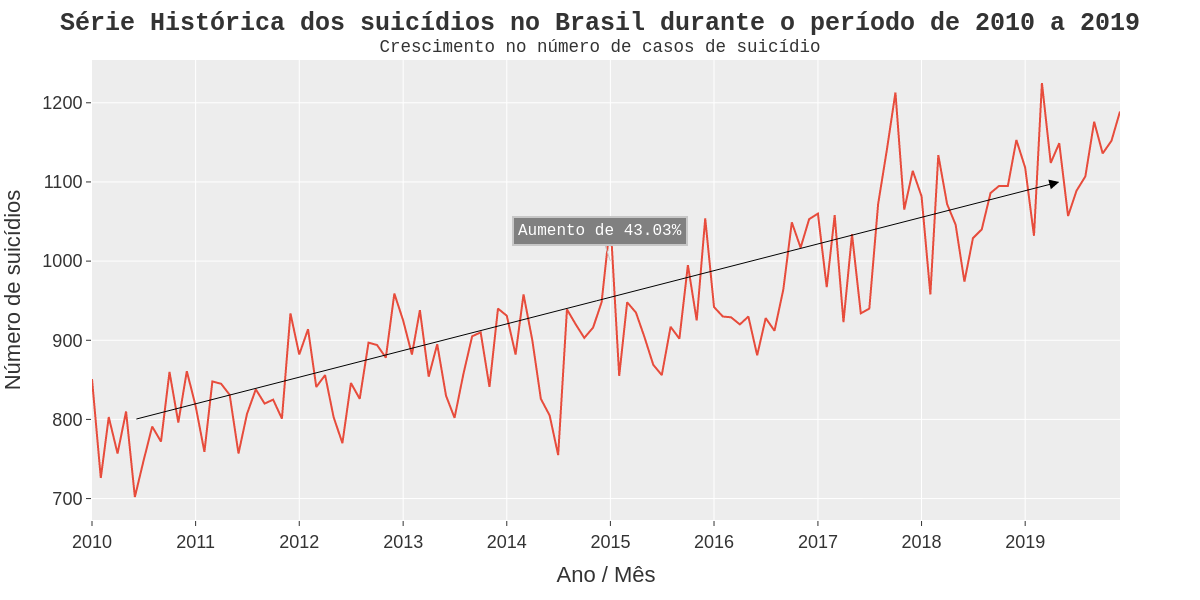

In [21]:
fig = px.line(df_data, 
              x=df_data['ano_mes'], 
              y=df_data['size'],
              labels=dict(y="Número de casos"),
              color_discrete_sequence=['#E74C3C'],
              height=600,
             width=1200,
             template='ggplot2')
fig.update_layout(yaxis_title='Número de suicídios',
                  xaxis_title='Ano / Mês',
                  title={
                  'text': "<b>Série Histórica dos suicídios no Brasil durante o período de 2010 a 2019</b><br><sup>Crescimento no número de casos de suicídio</sup>",
                  'xanchor': 'auto',
                  'yanchor': 'top'},
                  title_font_family="monospace",
                 title_font_size=25,
                  font_size=18)
fig.add_annotation( x='2019-05', 
                    y=1100,
                    text="",
                    showarrow=True,
                    arrowhead=2,
                    arrowsize = 2,
                    arrowcolor = 'black',
                    ax = '2010-06',
                    ay = 800,
                    axref="x",
                    ayref='y',)
fig.add_annotation( x='2015',
                    y=1000,
                    text="Aumento de 43.03%",
                    showarrow=True,
                    font=dict(
                    family="Courier New, monospace",
                    size=16,
                    color="#ffffff"),
                    align="center",
                    bordercolor="#c7c7c7",
                    borderwidth=2,
                    borderpad=4,
                    bgcolor="grey")
fig.show('png')

In [22]:
df_ano = df.groupby('ano').agg('size').reset_index()

In [23]:
df_ano.columns = ['year', 'size']

In [24]:
df_pop_brasil = pd.merge(df_ano, df_pop,how='inner', on="year")

In [25]:
df_pop_brasil['taxa']= (df_pop_brasil['size']/df_pop_brasil['Brazil'])*100000

In [26]:
((df_pop_brasil['taxa'][9]-df_pop_brasil['taxa'][0])/df_pop_brasil['taxa'][0])*100

32.641416209640475

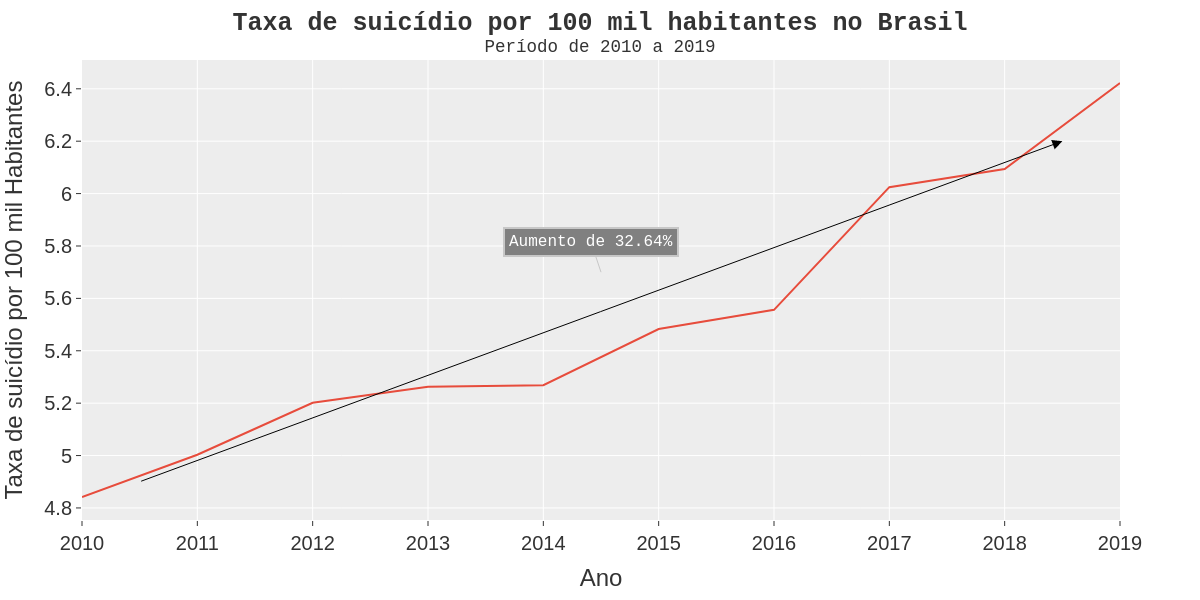

In [27]:
fig = px.line(df_pop_brasil, 
              x=df_pop_brasil['year'], 
              y=df_pop_brasil['taxa'],
              labels=dict(y="Número de casos"),
              color_discrete_sequence=['#E74C3C'],
              height=600,
             width=1200,
             template='ggplot2')
fig.update_layout(yaxis_title='Taxa de suicídio por 100 mil Habitantes',
                  xaxis_title='Ano',
                  title={
                  'text': "<b>Taxa de suicídio por 100 mil habitantes no Brasil</b><br><sup>Período de 2010 a 2019</sup>",
                  'xanchor': 'auto',
                  'yanchor': 'top'},
                  title_font_family="monospace",
                  title_font_size=25,
                  font_size=20)
fig.add_annotation( x='2018.5', 
                    y=6.2,
                    text="",
                    showarrow=True,
                    arrowhead=2,
                    arrowsize = 2,
                    arrowcolor = 'black',
                    ax = '2010.5',
                    ay = 4.9,
                    axref="x",
                    ayref='y',)
fig.add_annotation( x='2014.5',
                    y=5.7,
                    text="Aumento de 32.64%",
                    showarrow=True,
                    font=dict(
                    family="Courier New, monospace",
                    size=16,
                    color="#ffffff"),
                    align="center",
                    bordercolor="#c7c7c7",
                    borderwidth=2,
                    borderpad=4,
                    bgcolor="grey")
fig.show('png')

In [28]:
df_ano =  df.groupby('ano').agg('size').reset_index()

In [29]:
df_ano.columns = ['ano', 'size']

In [30]:
df_ano

,ano,size
0,2010,9476
1,2011,9882
2,2012,10366
3,2013,10579
4,2014,10683
5,2015,11211
6,2016,11455
7,2017,12521
8,2018,12764
9,2019,13554


In [31]:
((df_ano['size'][9]- df_ano['size'][0])/df_ano['size'][0])*100

43.035035880118194

# Comparação do Número de suicídios com o PIB Brasil
### Correlação não implica casualidade

In [32]:
df_tri= df.groupby('ano_tri').agg('size').reset_index()

In [33]:
df_tri.columns=['ano/trimestre','size']

In [34]:
df_concat = pd.concat([df_pip,df_tri['size']] ,axis=1)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
df_scaler = pd.DataFrame(scaler.fit_transform(df_concat.loc[:,'PIP':'size']), columns=['PIP','size'])

In [38]:
df_concat_scaler = pd.concat([df_concat['Trimestre/ano'],df_scaler], axis=1)

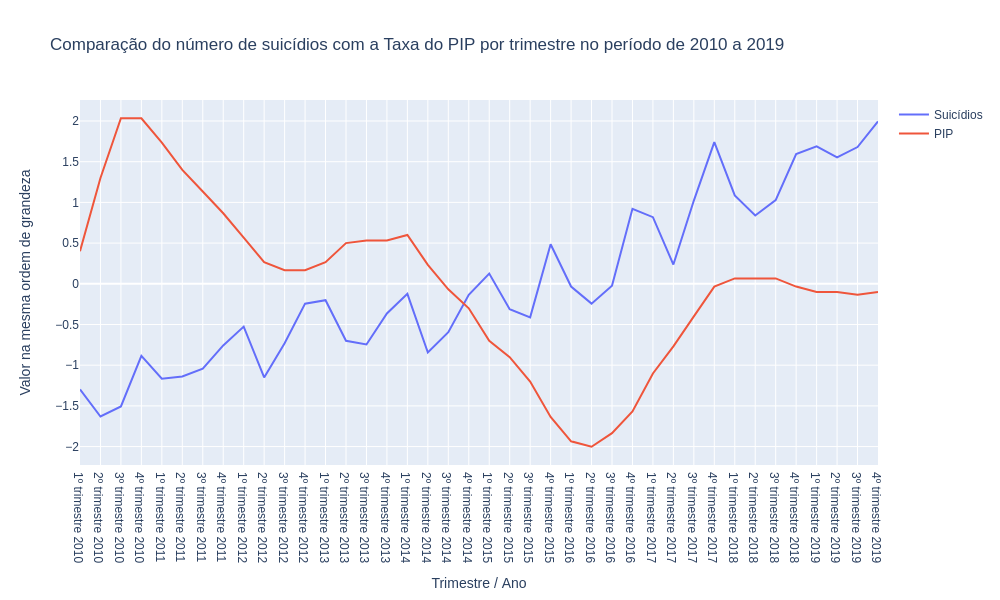

In [39]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(y=df_concat_scaler['size'], x=df_concat_scaler['Trimestre/ano'],
                    mode='lines',
                    name='Suicídios'))
fig.add_trace(go.Scatter(y=df_concat_scaler['PIP'], x=df_concat_scaler['Trimestre/ano'],
                    mode='lines',
                    name='PIP'))
fig.update_layout(title='Comparação do número de suicídios com a Taxa do PIP por trimestre no período de 2010 a 2019',
                   xaxis_title='Trimestre / Ano',
                  yaxis_title='Valor na mesma ordem de grandeza',
                  height=600,
                     width=1000,)
fig.show('png')

# Número de suicídio por Estado durante o período de 2010 a 2019

In [40]:
df_estado = df.groupby('estado').agg('size').reset_index()

In [41]:
df_estado.columns = ['estados', 'size']

In [42]:
df_sui_pop = pd.merge(df_estado, df_censo,how='inner', on="estados")

In [43]:
df_sui_pop['taxa']= (df_sui_pop['size']/df_sui_pop['censo2010'])*100000

In [44]:
df_sui_pop.sort_values(by='taxa',ascending=False)[:3]

,estados,size,censo2010,taxa
22,RS,11860,10693929,110.904047
23,SC,6349,6248436,101.609427
11,MS,2290,2449024,93.506638


In [45]:
df_sui_pop.sort_values(by='taxa',ascending=False)[-3:]

,estados,size,censo2010,taxa
4,BA,5142,14016906,36.684273
13,PA,2640,7581051,34.823668
18,RJ,5373,15989929,33.602401


In [46]:
df_estado_ano = pd.DataFrame(df.groupby(['ano','estado']).agg('size'))

In [47]:
df_estado_ano.columns = [ 'size']

In [48]:
geojson = json.load(open('brasil_estados.json'))

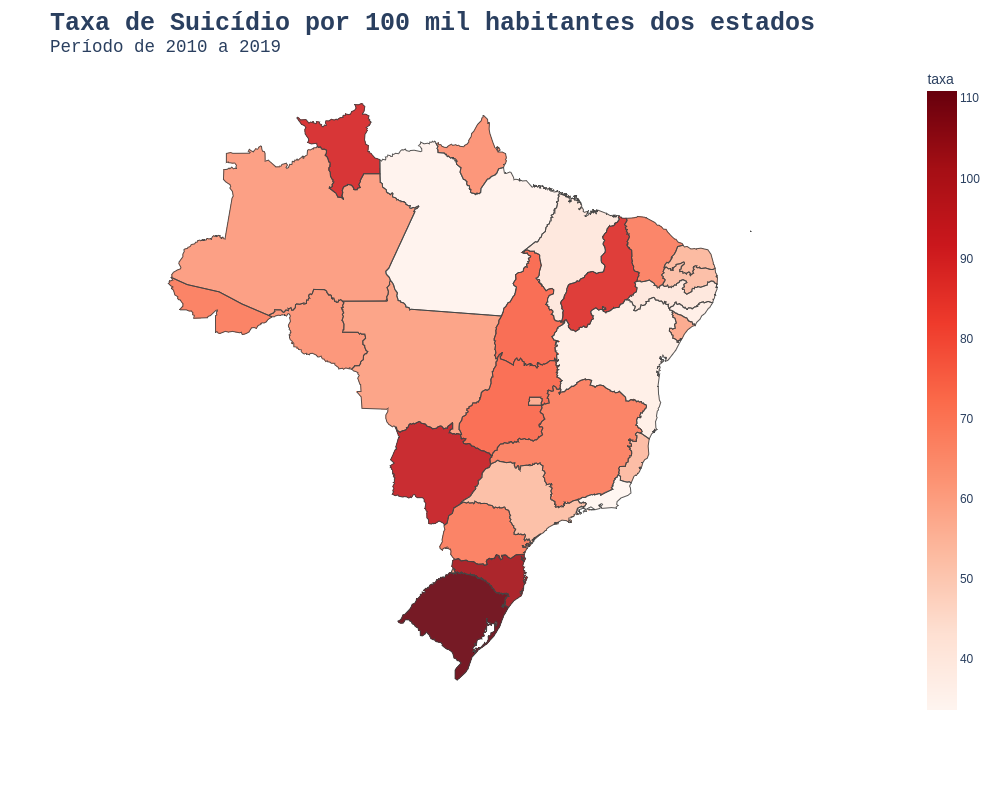

In [49]:
mapa = px.choropleth_mapbox(df_sui_pop, geojson=geojson, locations='estados', color='taxa',
                           color_continuous_scale="reds",
                           mapbox_style="white-bg",
                           zoom=3.3, center =  {"lat":-15 ,"lon":  -51},
                           opacity=0.9,
                           height=800, width=1000)

mapa.update_geos(fitbounds="locations", visible=False)
mapa.update_layout(title={
                'text': "<b>Taxa de Suicídio por 100 mil habitantes dos estados</b><br><sup>Período de 2010 a 2019</sup>",
                'xanchor': 'left',
                'yanchor': 'top'},
                 title_font_family="monospace",
                  title_font_size=25)

mapa.show('png')

## Número de suicídio por sexo

In [50]:
x = df.groupby(['SEXO'])['SEXO'].count()
y=len(df)
r=((x/y)).round(2)
sex_ratio = pd.DataFrame(r).T

In [51]:
k = df.groupby(['ano','SEXO'])['SEXO'].count()
k_df = pd.DataFrame(k)
k_df

SEXO
ano  SEXO            
2010 Feminino    2084
     Masculino   7392
2011 Feminino    2101
     Masculino   7780
2012 Feminino    2273
     Masculino   8090
2013 Feminino    2235
     Masculino   8343
2014 Feminino    2244
     Masculino   8438
2015 Feminino    2405
     Masculino   8804
2016 Feminino    2386
     Masculino   9067
2017 Feminino    2676
     Masculino   9840
2018 Feminino    2739
     Masculino  10020
2019 Feminino    2932
     Masculino  10620

In [52]:
df['ano'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [53]:
for ano in df['ano'].unique():
    divisor = k_df.loc[(ano)].sum()
    k_df.loc[(ano, "Feminino")]=(k_df.loc[(ano, "Feminino")]/divisor).round(2)
    k_df.loc[(ano, "Masculino")]=(k_df.loc[(ano, "Masculino")]/divisor).round(2)
k_df

SEXO
ano  SEXO           
2010 Feminino   0.22
     Masculino  0.78
2011 Feminino   0.21
     Masculino  0.79
2012 Feminino   0.22
     Masculino  0.78
2013 Feminino   0.21
     Masculino  0.79
2014 Feminino   0.21
     Masculino  0.79
2015 Feminino   0.21
     Masculino  0.79
2016 Feminino   0.21
     Masculino  0.79
2017 Feminino   0.21
     Masculino  0.79
2018 Feminino   0.21
     Masculino  0.79
2019 Feminino   0.22
     Masculino  0.78

In [54]:
k_df.loc[(ano)].T.index

Index(['SEXO'], dtype='object')

In [55]:
sex_ratio

SEXO,Feminino,Masculino
SEXO,0.21,0.79


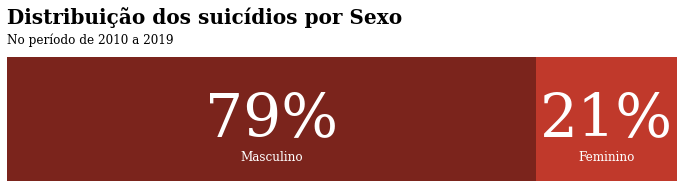

In [56]:
fig, ax = plt.subplots(1,1,figsize=(12, 2.5))

ax.barh(sex_ratio.index, sex_ratio['Masculino'], 
        color='#7B241C', alpha=1, label='Masculino')
ax.barh(sex_ratio.index, sex_ratio['Feminino'], left=sex_ratio['Masculino'], 
        color='#C0392B', alpha=1, label='Feminino')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# male percentage
for i in sex_ratio.index:
    ax.annotate(f"{int(sex_ratio['Masculino'][i]*100)}%", 
                   xy=(sex_ratio['Masculino'][i]/2, i),
                   va = 'center', ha='center',fontsize=60, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Masculino", 
                   xy=(sex_ratio['Masculino'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    
    
for i in sex_ratio.index:
    ax.annotate(f"{int(sex_ratio['Feminino'][i]*100)}%", 
                   xy=(sex_ratio['Masculino'][i]+sex_ratio['Feminino'][i]/2, i),
                   va = 'center', ha='center',fontsize=60, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("Feminino", 
                   xy=(sex_ratio['Masculino'][i]+sex_ratio['Feminino'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')


# Title & Subtitle
fig.text(0.125,1.03,'Distribuição dos suicídios por Sexo ', fontfamily='serif',fontsize=20, fontweight='bold')
fig.text(0.125,0.92,'No período de 2010 a 2019',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.show()

In [57]:
data = {'Masculino':round((sex_ratio['Masculino']['SEXO']*100), 2),
       'Feminino':round((sex_ratio['Feminino']['SEXO']*100), 2)}

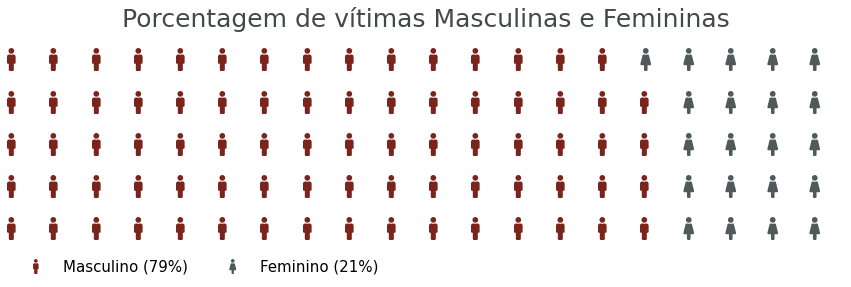

In [58]:
data = {'Masculino':round((sex_ratio['Masculino']['SEXO']*100), 2),
       'Feminino':round((sex_ratio['Feminino']['SEXO']*100), 2)}
font_title = {'family': 'sans-serif', 'color':'#424949','weight': 'normal','size': 25}

fig = plt.figure(
      FigureClass = Waffle,
      rows = 5,
      columns = 20,
      colors = ('#7B241C', '#515A5A'),
      values = data, icons = ['male', 'female'], icon_size = 23,
      title = {'label':'Porcentagem de vítimas Masculinas e Femininas',
               'loc': 'center', 'fontdict':font_title},
      labels = [f"{k} ({round(v / sum(data.values()) * 100)}%)" for k, v in data.items()],
      legend = {        
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.25),
        'ncol': len(data),
        'framealpha': 0,
        'fontsize': 15
    },
      icon_legend = True,
      figsize=(15,6)
)
fig.set_tight_layout(False)
plt.show();

# Número de suicídio por RAÇA / COR no período de 2010 a 2019

In [59]:
df['RACACOR'].unique()

array(['Parda', 'Preta', nan, 'Branca', 'Amarela', 'Indígena'],
      dtype=object)

In [60]:
df['RACACOR'].fillna('Não Informado', inplace=True)

In [61]:
df_raca = df.groupby(['RACACOR']).agg('size').reset_index()

In [62]:
df_raca.columns = ['RACACOR', 'size']

In [63]:
df_raca.sort_values(by='size', ascending=False,inplace=True)

In [64]:
df_raca.reset_index(drop=True , inplace=True)

In [65]:
df_raca['size'][0]*100/df_raca['size'].sum()

49.84843231902997

In [66]:
df_raca['size'][1]*100/df_raca['size'].sum()

40.62102745997458

In [87]:
df_raca_ano = pd.DataFrame(df.groupby(['ano','RACACOR']).agg('size'))

In [88]:
df_raca_ano.columns=['size']

In [93]:
df_raca_ano.loc[(2010)].sort_values(by='size', ascending=False).index

Index(['Branca', 'Parda', 'Preta', 'Não Informado', 'Indígena', 'Amarela'], dtype='object', name='RACACOR')

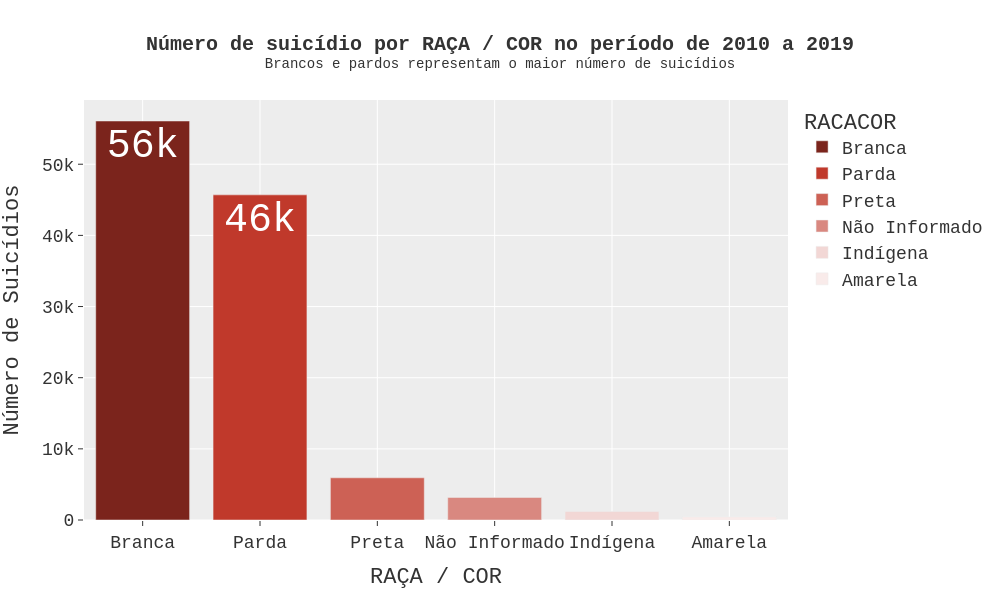

In [75]:
fig = px.bar(df_raca, y="size", x="RACACOR",
             color='RACACOR',
            title='Número de suicídio por RAÇA / COR no período de 2010 a 2019',
            color_discrete_sequence=['#7B241C','#C0392B','#CD6155','#D98880','#F2D7D5','#F9EBEA'],
            height=600,
             width=1000,text='size',
            template ='ggplot2')
fig.update_layout(yaxis_title='Número de Suicídios',
                 xaxis_title='RAÇA / COR',
                 font=dict(
                family="Courier New, monospace",
                size=18),
                  title={
                  'text': "<b>Número de suicídio por RAÇA / COR no período de 2010 a 2019</b><br><sup>Brancos e pardos representam o maior número de suicídios</sup>",
                  'xanchor': 'auto',
                  'yanchor': 'top'},
                  title_font_family="monospace",
                  title_font_size=20)
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
fig.update_layout(uniformtext_minsize=40, uniformtext_mode='hide')
fig.show("png")

# Número de suicídio por estado civil no período de 2010 a 2019

In [94]:
df['ESTCIV'].unique()

array(['Solteiro/a', 'Casado/a', nan, 'Viúvo/a',
       'Separado/a judicialmente', 'União consensual'], dtype=object)

In [95]:
df['ESTCIV'].isnull().sum()

8700

In [96]:
df['ESTCIV'].fillna('Não Informado', inplace=True)

In [97]:
df_estciv = df.groupby('ESTCIV').agg('size').reset_index()

In [98]:
df_estciv_ano = pd.DataFrame(df.groupby(['ano','ESTCIV']).agg('size'))

In [99]:
df_estciv_ano

0
ano  ESTCIV                        
2010 Casado/a                  2783
     Não Informado              670
     Separado/a judicialmente   613
     Solteiro/a                4966
     União consensual            35
     Viúvo/a                    409
2011 Casado/a                  2769
     Não Informado              887
     Separado/a judicialmente   614
     Solteiro/a                4917
     União consensual           318
     Viúvo/a                    377
2012 Casado/a                  2848
     Não Informado              868
     Separado/a judicialmente   702
     Solteiro/a                5017
     União consensual           521
     Viúvo/a                    410
2013 Casado/a                  2791
     Não Informado              900
     Separado/a judicialmente   737
     Solteiro/a                5215
     União consensual           529
     Viúvo/a                    407
2014 Casado/a                  2854
     Não Informado              826
     Separado/a judicialmente   717
     Solteiro/a                5331
     União consensual           542
     Viúvo/a                    413
2015 Casado/a                  2963
     Não Informado              790
     Separado/a judicialmente   755
     Solteiro/a                5632
     União consensual           604
     Viúvo/a                    467
2016 Casado/a                  3097
     Não Informado              838
     Separado/a judicialmente   810
     Solteiro/a                5678
     União consensual           629
     Viúvo/a                    403
2017 Casado/a                  3281
     Não Informado              899
     Separado/a judicialmente   931
     Solteiro/a                6297
     União consensual           664
     Viúvo/a                    449
2018 Casado/a                  3240
     Não Informado              976
     Separado/a judicialmente   933
     Solteiro/a                6470
     União consensual           705
     Viúvo/a                    440
2019 Casado/a                  3375
     Não Informado             1046
     Separado/a judicialmente   959
     Solteiro/a                7000
     União consensual           733
     Viúvo/a                    441

In [100]:
df_estciv_ano.columns = ['size']

In [106]:
df_estciv_ano

size
ano  ESTCIV                        
2010 Casado/a                  2783
     Não Informado              670
     Separado/a judicialmente   613
     Solteiro/a                4966
     União consensual            35
     Viúvo/a                    409
2011 Casado/a                  2769
     Não Informado              887
     Separado/a judicialmente   614
     Solteiro/a                4917
     União consensual           318
     Viúvo/a                    377
2012 Casado/a                  2848
     Não Informado              868
     Separado/a judicialmente   702
     Solteiro/a                5017
     União consensual           521
     Viúvo/a                    410
2013 Casado/a                  2791
     Não Informado              900
     Separado/a judicialmente   737
     Solteiro/a                5215
     União consensual           529
     Viúvo/a                    407
2014 Casado/a                  2854
     Não Informado              826
     Separado/a judicialmente   717
     Solteiro/a                5331
     União consensual           542
     Viúvo/a                    413
2015 Casado/a                  2963
     Não Informado              790
     Separado/a judicialmente   755
     Solteiro/a                5632
     União consensual           604
     Viúvo/a                    467
2016 Casado/a                  3097
     Não Informado              838
     Separado/a judicialmente   810
     Solteiro/a                5678
     União consensual           629
     Viúvo/a                    403
2017 Casado/a                  3281
     Não Informado              899
     Separado/a judicialmente   931
     Solteiro/a                6297
     União consensual           664
     Viúvo/a                    449
2018 Casado/a                  3240
     Não Informado              976
     Separado/a judicialmente   933
     Solteiro/a                6470
     União consensual           705
     Viúvo/a                    440
2019 Casado/a                  3375
     Não Informado             1046
     Separado/a judicialmente   959
     Solteiro/a                7000
     União consensual           733
     Viúvo/a                    441

In [101]:
df_estciv.columns = ['estciv', 'size']

In [102]:
df_estciv.sort_values(by='size',ascending=False, inplace=True)

In [103]:
df_estciv['size'][3]*100/df_estciv['size'].sum() #%

50.24668640157879

In [104]:
df_estciv['estciv']

3                  Solteiro/a
0                    Casado/a
1               Não Informado
2    Separado/a judicialmente
4            União consensual
5                     Viúvo/a
Name: estciv, dtype: object

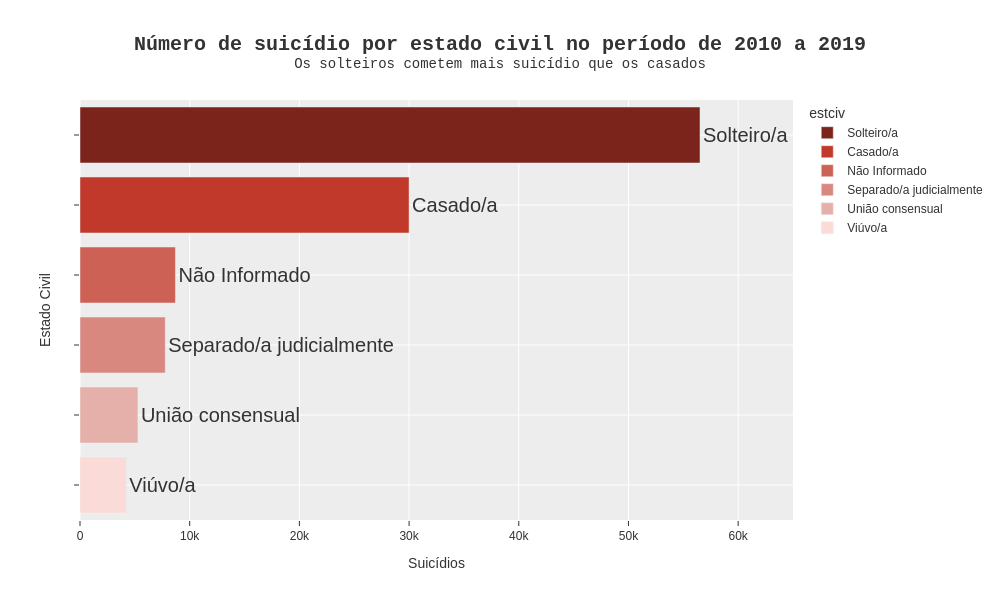

In [105]:
fig = px.bar(df_estciv, x="size",y="estciv",
             color='estciv',
             title='Número de suicídio por estado civil no período de 2010 a 2019',
             color_discrete_sequence=['#7B241C','#C0392B','#CD6155','#D98880','#E6B0AA','#FADBD8'],
             height=600,
             width=1000,
             text='estciv',
             template='ggplot2')
fig.update_traces( textposition='outside',textfont_size=20)
fig.update_yaxes(showticklabels=False)
fig.update_layout(xaxis_range=[0,65000],
                  xaxis_title='Suicídios',
                  yaxis_title='Estado Civil',
                  title={
                  'text': "<b>Número de suicídio por estado civil no período de 2010 a 2019</b><br><sup>Os solteiros cometem mais suicídio que os casados</sup>",
                  'xanchor': 'auto',
                  'yanchor': 'top'},
                  title_font_family="monospace",
                  title_font_size=20)
fig.show("png")

# Faixa etária

In [ ]:
df_idade = df.dropna(subset = ['DTNASC'])

In [ ]:
df_idade.dtypes

In [ ]:
fig = px.box(df, y=df['ano_nasc'].astype(float),title='Outliers')
fig.show("png")

In [ ]:
df_idade = df[df['ano_nasc'].astype(float).between(1925, 2019)]

In [ ]:
df_idade['idade'] = ((df_idade.DTOBITO - df_idade.DTNASC)/np.timedelta64(1, 'Y')).astype('int')

In [ ]:
bins= [0,10,20,30,40,50,60,70,80,90,110]
labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-110']

In [ ]:
df_idade['grupos'] = pd.cut(df_idade['idade'], bins=bins, labels=labels, right=False)

In [ ]:
df_idade['idade'].median()

In [ ]:
df_idade['idade'].mean()

In [ ]:
df_idade_gp = df_idade.groupby('grupos').agg('size').reset_index()

In [ ]:
df_idade_gp.columns = ['grupos','size']

In [ ]:
df_idade_gp['size'][2:4].sum() *100/df_idade_gp['size'].sum()#%

In [ ]:
df_idade

In [ ]:
df_idade_gp

In [ ]:
color_map = ['#EAECEE' for _ in range(9)]
color_map[3] = color_map[2] = '#A93226' 

fig, ax = plt.subplots(1,1, figsize=(12, 10),dpi=600)
ax.bar(df_idade_gp['grupos'], df_idade_gp['size'], width=0.7, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)


# anotações
for i in range(0,len(df_idade_gp['grupos'])):
    ax.annotate(f"{df_idade_gp['size'][i]}", 
                   xy=(i, df_idade_gp['size'][i] + 3),
                   va = 'bottom', ha='center',fontweight='light', fontfamily='serif')
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.set_xticklabels(df_idade_gp['grupos'], fontfamily='serif', rotation=0)

# titulos 

fig.text(0.09, 1, 'Suicídio no Brasil por faixa etária no período de 2010 a 2019', fontsize=16, fontweight='bold', fontfamily='monospace')
fig.text(0.09, 0.95, 'As faixas etárias que mais cometem suicídio estão destacadas', fontsize=12, fontweight='light', fontfamily='monospace')


ax.grid(axis='y', linestyle='-', alpha=0.4) 
ax.set_axisbelow(True)

#Axis labels

plt.xlabel("Faixa Etária", fontsize=12, fontweight='light', fontfamily='serif',loc='center',y=-2)


# Local da Ocorrência

In [ ]:
df['LOCOCOR'].fillna('Não Informado', inplace=True)

In [ ]:
df['LOCOCOR'].unique()

In [ ]:
df['LOCOCOR'].replace('Outro estabelecimento de saúde','Departamentos de Saúde', inplace=True)
df['LOCOCOR'].replace('Hospital','Departamentos de Saúde', inplace=True)

In [ ]:
df['LOCOCOR'].unique()

In [ ]:
df_lococor = df.groupby('LOCOCOR').agg('size').reset_index()

In [ ]:
df_lococor

In [ ]:
df_lococor.columns = ['lococor','size']

In [ ]:
df_lococor.sort_values(by='size',ascending=False,inplace=True)

In [ ]:
df_lococor.reset_index(drop=True, inplace=True)

In [ ]:
(df_lococor['size'][0]/df_lococor['size'].sum())*100

In [ ]:
(df_lococor['size'][1]/df_lococor['size'].sum())*100

In [ ]:
df_lococor['size'][0] -df_lococor['size'][1]

In [ ]:
fig = px.bar(df_lococor, y="size", x="lococor",
             color='lococor',
             color_discrete_sequence=['#7B241C','#C0392B','#CD6155','#D98880','#F2D7D5'],
             height=600,
             width=1000,
             text = 'size',
             template='ggplot2')
fig.update_layout(yaxis_title='Número de Suicídios',
                  xaxis_title='Local da ocorrência',
                  title={
                  'text': "<b>Locais onde ocerram os suicídios no período de 2010 a 2019</b><br><sup>Domicílio é o principal local</sup>",
                  'xanchor': 'auto',
                  'yanchor': 'top'},
                  title_font_family="monospace",
                  title_font_size=25)
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
fig.update_layout(uniformtext_minsize=40, uniformtext_mode='hide')
fig.add_annotation( x='Departamentos de Saúde', 
                    y=65000,
                    text="",
                    showarrow=True,
                    arrowhead=2,
                    arrowsize = 2,
                    arrowcolor = 'black',
                    ax = 'Departamentos de Saúde',
                    ay = 20000,
                    axref="x",
                    ayref='y',)
fig.add_annotation( x='Outros',
                    y=40000,
                    text="Diferença de 48909 casos",
                    showarrow=True,
                    font=dict(
                    family="Courier New, monospace",
                    size=16,
                    color="#ffffff"),
                    align="center",
                    bordercolor="#c7c7c7",
                    borderwidth=2,
                    borderpad=4,
                    bgcolor="grey")
fig.show("png")

# Escolaridade

In [ ]:
df_esc = df.groupby('ESC').agg('size').reset_index()

In [ ]:
df_esc

In [ ]:
df_esc.columns = ['Escolaridade', 'size']

In [ ]:
df_esc.sort_values(by=['Escolaridade'], ascending=True)

In [ ]:
df2 = pd.DataFrame({
    'Escolaridade': ['1 a 3 anos', '4 a 7 anos', '8 a 11 anos', '12 e mais', 'Nenhuma'],
    'num': [0, 1, 2, 3, 4]})

In [ ]:
df_esc = pd.merge(df_esc, df2, on='Escolaridade')

In [ ]:
df_esc.sort_values(by='num', ascending=True,inplace=True)

In [ ]:
df_esc.reset_index(drop=True,inplace=True)

In [ ]:
color_map = ['#EAECEE' for _ in range(9)]
color_map[2] = color_map[1] = '#A93226' 

fig, ax = plt.subplots(1,1, figsize=(12, 10),dpi=600)
ax.bar(df_esc['Escolaridade'], df_esc['size'], width=0.7, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)


#anotações
for i in df_esc['Escolaridade'].index:
    ax.annotate(f"{df_esc['size'][i]}", 
                   xy=(i, df_esc['size'][i] + 3),
                   va = 'bottom', ha='center',fontweight='light', fontfamily='serif')
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.set_xticklabels(df_esc['Escolaridade'], fontfamily='serif', rotation=0)

# Titulos

fig.text(0.09, 1, 'Nível de escolaridade X Número de suicídios', fontsize=16, fontweight='bold', fontfamily='monospace')
fig.text(0.09, 0.96, '1 a 3 anos : Fundamental 1 incompleto', fontsize=12, fontweight='light', fontfamily='monospace')
fig.text(0.09, 0.94, '4 a 7 anos : Fundamental 1 completo / Fundamental 2 incompleto', fontsize=12, fontweight='light', fontfamily='monospace')
fig.text(0.09, 0.92, '8 a 11 anos :  Ensino médio completo ou incompleto', fontsize=12, fontweight='light', fontfamily='monospace')
fig.text(0.09, 0.90, '12 e mais : Ensino superior completo ou incompleto', fontsize=12, fontweight='light', fontfamily='monospace')
ax.grid(axis='y', linestyle='-', alpha=0.4) 
ax.set_axisbelow(True)

#Axis labels

plt.xlabel("Escolaridade", fontsize=12, fontweight='light', fontfamily='serif',loc='center',y=-2)


# Ocupação / Profissão 

In [ ]:
df_ocup = df.groupby(['SEXO','OCUP']).agg('size').reset_index()
df_ocup_total = df.groupby('OCUP').agg('size').reset_index()

In [ ]:
df_ocup_ano = df.groupby(['ano','SEXO','OCUP']).agg('size')

In [ ]:
df_ocup_ano

In [ ]:
df_ocup.columns = ['SEXO','ocupacao', 'size']
df_ocup_total.columns = ['ocupacao', 'size']

In [ ]:
df_ocup_total.sort_values(by='size',ascending= False)[:3]

In [ ]:
df_ocup_masc = df_ocup[df_ocup['SEXO']=='Masculino']
df_ocup_fem = df_ocup[df_ocup['SEXO']=='Feminino']

In [ ]:
df_ocup_fem = df_ocup_fem.sort_values(by='size',ascending= False)[:3]

In [ ]:
df_ocup_masc = df_ocup_masc.sort_values(by='size',ascending= False)[:3]

In [ ]:
df_ocup_masc.reset_index(drop=True,inplace=True)
df_ocup_fem.reset_index(drop=True,inplace=True)

In [ ]:
list_ocup_masc = []
list_ocup_fem = []
label_masc = []
label_fem = []
for i in range(0,3):
    list_ocup_masc.append(df_ocup_masc['size'][i])
    list_ocup_fem.append(df_ocup_fem['size'][i])
    label_masc.append(df_ocup_masc['ocupacao'][i])
    label_fem.append(df_ocup_fem['ocupacao'][i])

In [ ]:
# Masculino 
make_text(1,
          3,
          2,
          list_ocup_masc,
          label_masc,
          figsize = (20,2), 
          title2 = 'Ocupação das vítimas do sexo Masculino',
          font_title = 40)

In [ ]:
# Feminino
make_text(1,
          3,
          2,
          list_ocup_fem,
          label_fem,
          figsize = (20,2), 
          title2 = 'Ocupação das vítimas do sexo Feminino',
          font_title = 40)

# Perfil das vítimas

In [ ]:
df_masc = df_idade[df_idade['SEXO']=='Masculino']
df_masc =df_masc.groupby(['SEXO','RACACOR','ESTCIV','ESC','grupos']).size().to_frame().reset_index()
df_masc.columns = ['SEXO','RACACOR', 'ESTCIV', 'ESC','grupo/idade','total vitimas']

In [ ]:
df_fem = df_idade[df_idade['SEXO']=='Feminino']
df_fem =df_fem.groupby(['SEXO','RACACOR','ESTCIV','ESC','grupos']).size().to_frame().reset_index()
df_fem.columns = ['SEXO','RACACOR', 'ESTCIV', 'ESC','grupo/idade','total vitimas']

In [ ]:
df_masc = df_masc.sort_values('total vitimas', ascending = False).reset_index(drop=True)
df_fem = df_fem.sort_values('total vitimas', ascending = False).reset_index(drop=True)

In [ ]:
df_masc.loc[1][0]

In [ ]:
df_fem.head(5)

In [ ]:
list_perfil_masc = []
label_perfil_masc = []

for i in range(0,5):
    list_perfil_masc.append(f'{df_masc["total vitimas"][i]} vitimas')
    label_perfil_masc.append(f'{i+1}°- {df_masc.loc[i][0]} , {df_masc.loc[i][1]} , {df_masc.loc[i][2]} ,Escolaridade: {df_masc.loc[i][3]} ,Entre {df_masc.loc[i][4]} Anos')
make_text(5,
          1,
          10,
          label_perfil_masc,
          label =  list_perfil_masc,
          font1_size = 15,
          font2_size = 15,
          ha = 'left',
          font1_color = '#5F6A6A',
          font2_color = '#A93226',
          font1_weight = 'heavy',
          font2_weight = 'bold',
          title1 = "Perfil das vítimas do sexo masculino",
          loc= 'center',
          a = 0,
          c = 0,
          figsize = (12, 5))

In [ ]:
list_perfil_fem = []
label_perfil_fem = []

for i in range(0,5):
    list_perfil_fem.append(f'{df_fem["total vitimas"][i]} vitimas')
    label_perfil_fem.append(f'{i+1}°- {df_fem.loc[i][0]} , {df_fem.loc[i][1]} , {df_fem.loc[i][2]} ,Escolaridade: {df_fem.loc[i][3]} ,Entre {df_fem.loc[i][4]} Anos')
make_text(5,
          1,
          10,
          label_perfil_fem,
          label =  list_perfil_fem,
          font1_size = 15,
          font2_size = 15,
          ha = 'left',
          font1_color = '#5F6A6A',
          font2_color = '#A93226',
          font1_weight = 'heavy',
          font2_weight = 'bold',
          title1 = "Perfil das vítimas do sexo feminino",
          loc= 'center',
          a = 0,
          c = 0,
          figsize = (12, 5))

# Setembro Amarelo

In [ ]:
setembro_mask = np.array(Image.open("mask.png")) # máscara

stopwords = set(STOPWORDS) # stop words
stopwords.update(["DA", "DE", "EM", "DE", "NO", "AO", "NOS"])

ocup = df.dropna(subset=['OCUP'], axis=0)['OCUP'] #retirar Nan values
all_ocup = " ".join(s for s in ocup) # juntar palavras
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1000, height=1000, max_words=200,
                      mask=setembro_mask, max_font_size=200,
                      relative_scaling =0,
                      colormap="autumn"
                     ).generate(all_ocup)


fig, ax = plt.subplots(figsize=(20,15))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()